In [177]:
import numpy as np
import matplotlib.pyplot as plt

## The request input part (Exp 1)
First experiment with 50 requests in total, 4 requests were rejected (not enqueued) 
With a probability of appr. 70% + 10%, user 2 requests arrived. The rest was left to users 0 and 1.
```
double rNum = random.nextDouble();
if (rNum > 0.3) {                               # 70% user 2
    user = new User(2, ++cnt);
else
    user = new User(random.nextInt(3), ++cnt);  # 10% user 2
```

# TODO:
## 1. Try without cutting off with rejected policy
## 2. increase q_swap factor, so to favor fast q

### This is a legend to the data in the csv files:

In [180]:
# IN,  1,     2,1852440846143583, 0,    1,         1
#
#  0,  1  ,   2  ,   3    ,   4   ,     5    ,     6
#
# IN, round, UID, arriTime, deqTime, prioQed,  requestID

#
#prioQed legend:
# F ---> 0    #Fast Queue
# S ---> 1    #Slow Queue
# R ---> 2    #Rejected (not enqueued)

In [215]:
# import csv data TODO

#Exp1: 50 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#data_all = np.genfromtxt("sorted_log.2024-08-22T23:20:00.212427.csv", delimiter=',')
#num_rejected = 4 # iterate through csv and count 'R's!

#Exp2: 50 req
#rNum > 0.5 for user 2 and user = new User(random.nextInt(2!!!not 3), ++cnt); for the user 0 and 1
#data_all = np.genfromtxt("sorted_exp2_log.2024-08-29T17:07:01.272412.csv", delimiter=',')
#num_rejected = 0 # iterate through csv and count 'R's!

#Exp3: 500 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + 50; //was @ 10
#REQUEST_COUNT_LIMIT = 30 //was 5
data_all = np.genfromtxt("sorted_exp3_log.2024-08-29T18:56:19.FS_no_R.csv", delimiter=',')
#num_rejected = 0 # iterate through csv and count 'R's!

In [216]:
#num_rejected = [ i for i in range(len(data_all)) if data_all[i, 5] == "F"]
num_rejected = 0
for i in range(len(data_all)):
    if data_all[i, 5] == 2:
        num_rejected += 1
num_rejected

0

In [218]:
with_rejected = False
arri_dq_t = 3   # 3 is cv index for arriTime and 4 is deqTime
UID = 2         #csv index for user id

total_requests = 500

csv_row_upper = 0
if with_rejected:
    csv_row_lower = total_requests - 1
else:
    csv_row_lower = (len(data_all) // 2) -1
total_time_IN =  data_all[csv_row_lower, arri_dq_t] - data_all[csv_row_upper, arri_dq_t]

total_time_IN, csv_row_lower, data_all[csv_row_lower,arri_dq_t], data_all[csv_row_upper, arri_dq_t]

(134016292.0, 279, 2130012757470250.0, 2130012623453958.0)

In [225]:
amount_intervalls = 14
time_intervall = total_time_IN / amount_intervalls
time_intervall

9572592.285714285

In [226]:
len_all = len(data_all)
len_clean = len_all - num_rejected
len_OUT_part = (len_clean // 2)
len_IN_part = csv_row_lower + 1 
len_all, len_clean, len_IN_part, len_OUT_part

(560, 560, 280, 280)

In [227]:
arr0 = np.zeros([amount_intervalls])
arr1 = np.zeros([amount_intervalls])
arr2 = np.zeros([amount_intervalls])
arr3 = np.zeros([amount_intervalls])
upper_idx = len_IN_part // amount_intervalls
lower_bound = data_all[csv_row_upper, arri_dq_t]
for k in range(1,amount_intervalls+1):
    arr_idx = k-1
    upper_bound = data_all[((k*upper_idx)-1), arri_dq_t]
    for i in range(len_IN_part):
        time = data_all[i, arri_dq_t]
        #print(i, lower_bound, time, upper_bound)
        if lower_bound <= time < upper_bound:
            match data_all[i,UID]:
                case 0:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr0[arr_idx] += 1
                    #print("0:",arr0)
                case 1:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr1[arr_idx] += 1
                    #print("1:",arr1)
                case 2:
                    if data_all[i,5] == 2:
                        arr3[arr_idx] += 1
                        continue
                    arr2[arr_idx] += 1
                    #print("2:",arr2)
    lower_bound = upper_bound
    #print("--------")
    
arr0.sum(), arr1.sum(), arr2.sum(),arr3.sum(),arr0, arr1, arr2, arr3
        

(39.0,
 50.0,
 190.0,
 0.0,
 array([ 2.,  2.,  0.,  1.,  3.,  1.,  1.,  3.,  2.,  0.,  2.,  3.,  6.,
        13.]),
 array([ 4.,  2.,  3.,  0.,  2.,  1.,  0.,  1.,  1.,  2.,  1., 12., 14.,
         7.]),
 array([13., 16., 17., 19., 15., 18., 19., 16., 17., 18., 17.,  5.,  0.,
         0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

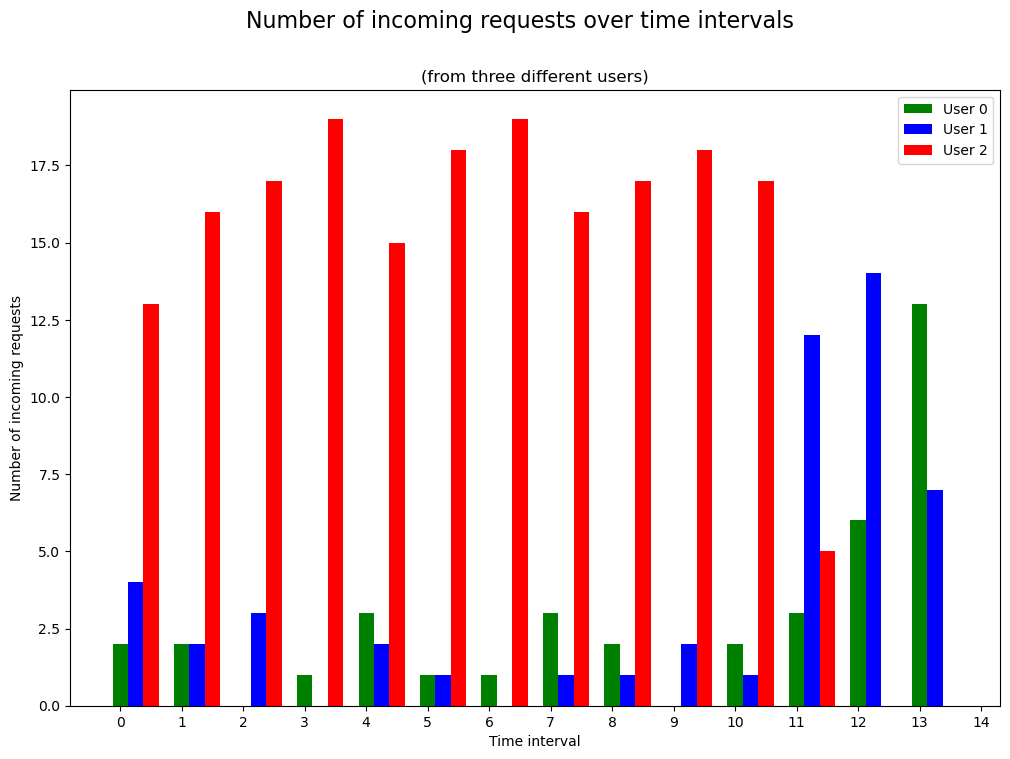

(39.0,
 50.0,
 190.0,
 0.0,
 array([ 2.,  2.,  0.,  1.,  3.,  1.,  1.,  3.,  2.,  0.,  2.,  3.,  6.,
        13.]),
 array([ 4.,  2.,  3.,  0.,  2.,  1.,  0.,  1.,  1.,  2.,  1., 12., 14.,
         7.]),
 array([13., 16., 17., 19., 15., 18., 19., 16., 17., 18., 17.,  5.,  0.,
         0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [228]:

x = [i for i in range(amount_intervalls)]
width=0.25
#alpha=0.5
ax = plt.figure(figsize=[12, 8])
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
#plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='Rejected' , color='black')
plt.xlabel('Time interval')
plt.ylabel('Number of incoming requests')
plt.suptitle('Number of incoming requests over time intervals', fontsize=16)#, y=1.00)
plt.title('(from three different users)')
plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.show()

arr0.sum(),arr1.sum(),arr2.sum(),arr3.sum(),arr0, arr1, arr2, arr3